<h1>Data Visualisation of Finacial services use in Tanzania</h1>
<h5>Author: kevin Mntambo</h5>
<b>Description:</b>We look at the at the use of fincial services in Tanzania, whereby we use graphs to better visualize and understand how factors like gender, age, marital status, land ownership , types of income and geographic location can affect how an individual accesses these services.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from mpl_toolkits.basemap import Basemap

mobile_money_df = pd.read_csv('../data/training.csv')
print(mobile_money_df.shape)
mobile_money_df.head()


(7094, 37)


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


This data seet is made up of 7094 rows and 37 columns.
From the snap shot of the data , nothing seems out order everything seems to be in place.


In [3]:
mobile_money_df.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

There are no missing values.

In [4]:

#checking how manny unique id we have incase some are repeating.
print(mobile_money_df['ID'].unique().size)

7094


There are no repeating entries. All entries have a unique ID.

In [5]:


mobile_money_df.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


We look for outliers ,by checking the max values which tell us if a question has a higher  value than the allotted highest option, we can do the same for the min values checking if the lowest value for each question is not below the alloted lowest option.
I could not find any values that are above or below their respective max and min thresholds, therefore the data seems to have no outliers or inacurate data.

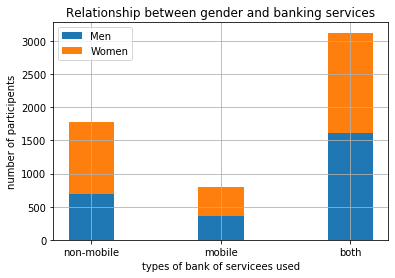

In [6]:
mobile_money_df.groupby()


#this is for males
noob = len(mobile_money_df.loc[(mobile_money_df['mobile_money_classification'] == 0)& (mobile_money_df['Q2'] == 1)])
nomob = len(mobile_money_df.loc[(mobile_money_df['mobile_money_classification'] == 1) & (mobile_money_df['Q2'] == 1)])
mob =len( mobile_money_df.loc[(mobile_money_df['mobile_money_classification']==2) & (mobile_money_df['Q2'] == 1)])
both = len(mobile_money_df.loc[(mobile_money_df['mobile_money_classification']==3 )&(mobile_money_df['Q2'] == 1)])
#this is for the females
noob2 = len(mobile_money_df.loc[(mobile_money_df['mobile_money_classification'] == 0)& (mobile_money_df['Q2'] == 2)])
nomob2 = len(mobile_money_df.loc[(mobile_money_df['mobile_money_classification'] == 1) & (mobile_money_df['Q2'] == 2)])
mob2 =len( mobile_money_df.loc[(mobile_money_df['mobile_money_classification']==2) & (mobile_money_df['Q2'] == 2)])
both2 = len(mobile_money_df.loc[(mobile_money_df['mobile_money_classification']==3 )&(mobile_money_df['Q2'] == 2)])


somting= ['non-mobile','mobile','both']
xtings = [nomob,mob,both]
females = [nomob2,mob2,both2]
fig, ax = plt.subplots()

ax.bar(somting, xtings,0.35, label='Men')
ax.bar(somting, females, 0.35, bottom=xtings,label='Women')
ax.set_ylabel('number of participents')
ax.set_xlabel('types of bank of servicees used')
ax.set_title('Relationship between gender and banking services')
plt.grid(True)
ax.legend()
plt.show()

When dealing with their personal finances, women make use of non-mobile banking services more often than men do, while roughly an equal number of men and women do make use of mobile banking services. Whereas an equal number of both men and women make use of a mixture of both types of banking services. 

We can therefore conclude that, generally, men are more likely to make use of mobile means to handle their personal finance.

[]

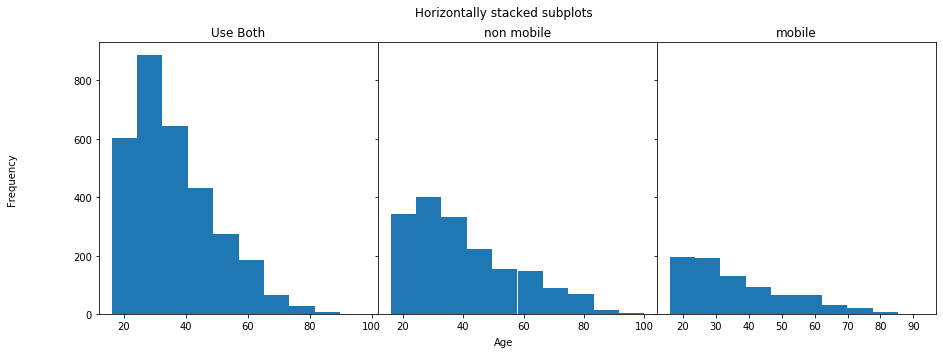

In [7]:

nomobile = mobile_money_df.loc[mobile_money_df["mobile_money_classification"] == 1]
mobile = mobile_money_df.loc[mobile_money_df["mobile_money_classification"] == 2]
bothY = mobile_money_df.loc[mobile_money_df["mobile_money_classification"] == 3]

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,5),sharey='row',gridspec_kw={'wspace': 0})
fig.suptitle('Horizontally stacked subplots')

fig.text(0.5, 0.04, 'Age', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

ax1.hist(bothY['Q1'])
ax1.set_title('Use Both')
ax2.hist(nomobile['Q1'])
ax2.set_title('non mobile')
ax3.hist(mobile['Q1'])
ax3.set_title('mobile')
plt.plot()

All the above graphs are positively skewed with no visible outliers. They display notably similar distribution with different volumes. Generally, the youth (people aged 20-40) make use of financial services much more than persons above the age of 40.
Most people use both mobile and non mobile services, lesser people use non mobile services only  and even lesser use soley mobile services.

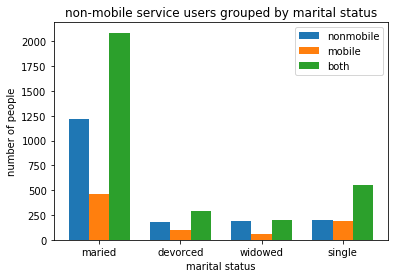

In [8]:
nomobile = mobile_money_df.loc[mobile_money_df['mobile_money_classification'] == 1]
mobile = mobile_money_df.loc[mobile_money_df['mobile_money_classification'] == 2]
have_both = mobile_money_df.loc[mobile_money_df['mobile_money_classification'] == 3]


nonmobile_status = nomobile.groupby('Q3').Q3.count()
mobile_status = mobile.groupby('Q3').Q3.count()
both_status = have_both.groupby('Q3').Q3.count()
N = 4
width = 0.25
status= np.arange(N)

plt.bar(status, nonmobile_status,width , label='nonmobile')
plt.bar(status+width, mobile_status, width , label='mobile')
plt.bar(status + 2 * width, both_status,width, label='both')

plt.ylabel('number of people')
plt.xlabel('marital status')
plt.title('non-mobile service users grouped by marital status')

plt.xticks(status + width , ('maried', 'devorced', 'widowed', 'single'))
plt.legend(loc='best')
plt.show()

 
The shape is generally the same for all the marital status categories ,most of them   make use of both  non-mobile and mobile means services less people soley use nonmobile and even lesser soley use mobile services. 

Upon closer inspection, we observe that a far greater number of married people make use of financial services than any other demographic, with the widowed population being the smallest group of people who use financial services as a whole. 

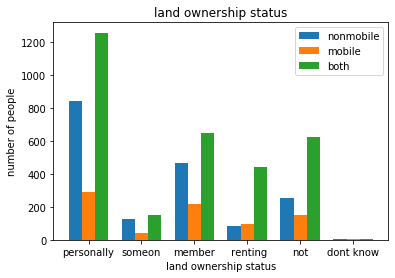

In [9]:
nonmobile_status = nomobile.groupby('Q5').Q5.count()
mobile_status = mobile.groupby('Q5').Q5.count()
both_status = have_both.groupby('Q5').Q5.count()
N = 6
width = 0.25
status= np.arange(N)

plt.bar(status, nonmobile_status, width , label='nonmobile')
plt.bar(status+width, mobile_status, width , label='mobile')
plt.bar(status + 2 * width, both_status,width, label='both')

plt.ylabel('number of people')
plt.xlabel('land ownership status')
plt.title('land ownership status')

plt.xticks(status + width , ('personally','someon', 'member', ' renting','not','dont know' ))
plt.legend(loc='best')

plt.show()

There is a direct correlation between land ownership and the number of people who make use of banking services, regardless of whether it's mobile or non-mobile. 

In most cases, regardless of land ownership status, the number of people who make use of mobile financial services are generally the lowest, with those who make use of non-mobile services being significantly greater and those who make use of both being the greatest. This observation, however, excludes the obvious outlier of people who rent property: the people make use of more mobile financial services exceed those who make use of non-mobile financial services. 

Land ownership status Trend relationship didn’t change between mobile non-mobile and both,is the same , renting seem interesting seem they seem to not use non mobile the least ,mobile and both.

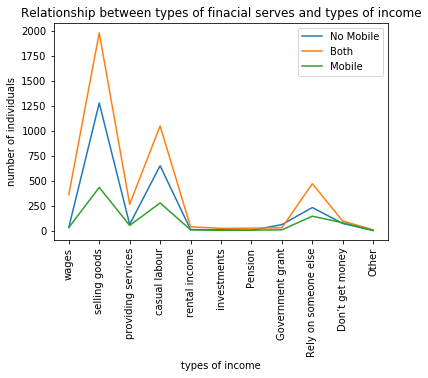

In [10]:
nom_val1 = (nomobile['Q8_1'] == 1).sum()
nom_val2 = (nomobile['Q8_2'] == 1).sum()
nom_val3 = (nomobile['Q8_3'] == 1).sum()
nom_val4 = (nomobile['Q8_4'] == 1).sum()
nom_val5 = (nomobile['Q8_5'] == 1).sum()
nom_val6 = (nomobile['Q8_6'] == 1).sum()
nom_val7 = (nomobile['Q8_7'] == 1).sum()
nom_val8 = (nomobile['Q8_8'] == 1).sum()
nom_val9 = (nomobile['Q8_9'] == 1).sum()
nom_val10 = (nomobile['Q8_10'] == 1).sum()
nom_val11 = (nomobile['Q8_11'] == 1).sum()

val1 = (bothY['Q8_1'] == 1).sum()
val2 = (bothY['Q8_2'] == 1).sum()
val3 = (bothY['Q8_3'] == 1).sum()
val4 = (bothY['Q8_4'] == 1).sum()
val5 = (bothY['Q8_5'] == 1).sum()
val6 = (bothY['Q8_6'] == 1).sum()
val7 = (bothY['Q8_7'] == 1).sum()
val8 = (bothY['Q8_8'] == 1).sum()
val9 = (bothY['Q8_9'] == 1).sum()
val10 = (bothY['Q8_10'] == 1).sum()
val11 = (bothY['Q8_11'] == 1).sum()

mob_val1 = (mobile['Q8_1'] == 1).sum()
mob_val2 = (mobile['Q8_2'] == 1).sum()
mob_val3 = (mobile['Q8_3'] == 1).sum()
mob_val4 = (mobile['Q8_4'] == 1).sum()
mob_val5 = (mobile['Q8_5'] == 1).sum()
mob_val6 = (mobile['Q8_6'] == 1).sum()
mob_val7 = (mobile['Q8_7'] == 1).sum()
mob_val8 = (mobile['Q8_8'] == 1).sum()
mob_val9 = (mobile['Q8_9'] == 1).sum()
mob_val10 = (mobile['Q8_10'] == 1).sum()
mob_val11 = (mobile['Q8_11'] == 1).sum()

mobile_income_df= mobile_money_df.loc[:,'Q8_1':'Q8_11']


N = 11
ind = np.arange(N) 
plt.plot([nom_val1,nom_val2,nom_val3,nom_val4,nom_val5,nom_val6,nom_val7,nom_val8,nom_val9,nom_val10,nom_val11],label="No Mobile")
plt.plot([val1,val2,val3,val4,val5,val6,val7,val8,val9,val10,val11],label="Both")
plt.plot([mob_val1,mob_val2,mob_val3,mob_val4,mob_val5,mob_val6,mob_val7,mob_val8,mob_val9,mob_val10,mob_val11],label="Mobile")
plt.legend()
plt.xlabel('types of income')
plt.ylabel('number of individuals')
plt.title('Relationship between types of finacial serves and types of income')
plt.xticks(ind, ('wages', 'selling goods', 'providing services', 'casual labour', 'rental income', 'investments', 'Pension', 'Government grant', 'Rely on someone else', 'Don’t get money', 'Other'),rotation = 90)

plt.show()

According to the line graph above, persons with all types of income sources make use of financial services (with investments, pension, rental income and governmental grants having relatively zero users of financial services). 

We can also see that people who make an income by selling goods, doing casual labour, or by relying on someone else make use of more financial services, regardless of the means, than people with other income streams. 

A common trend amongst all categories is that, overall, the number of people who make use of mobile financial services comprise of the least number of people, within the sample, with the number of people making use of non-financial services slightly greater. Those who make use of both methods have the largest number of people. 

In [11]:
non = mobile_money_df.loc[mobile_money_df['Q16'] == -1]
never = mobile_money_df.loc[mobile_money_df['Q16'] == 1]
daily = mobile_money_df.loc[mobile_money_df['Q16'] == 2]
weekly = mobile_money_df.loc[mobile_money_df['Q16'] == 3]
monthly = mobile_money_df.loc[mobile_money_df['Q16'] == 4]
les_than_month = mobile_money_df.loc[mobile_money_df['Q16'] == 5]


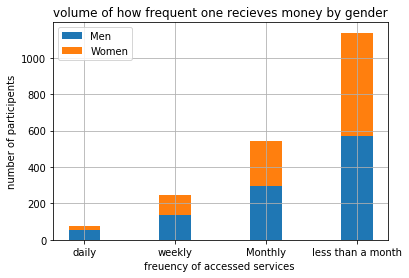

In [12]:
#this is for males
noob = len(mobile_money_df.loc[(mobile_money_df['Q16'] == 1)& (mobile_money_df['Q2'] == 1)])
nomob = len(mobile_money_df.loc[(mobile_money_df['Q16'] == 2) & (mobile_money_df['Q2'] == 1)])
mob =len( mobile_money_df.loc[(mobile_money_df['Q16']==3) & (mobile_money_df['Q2'] == 1)])
both = len(mobile_money_df.loc[(mobile_money_df['Q16']==4 )&(mobile_money_df['Q2'] == 1)])
bot = len(mobile_money_df.loc[(mobile_money_df['Q16']==5 )&(mobile_money_df['Q2'] == 1)])
#this is for the females
noob2 = len(mobile_money_df.loc[(mobile_money_df['Q16'] == 1)& (mobile_money_df['Q2'] == 2)])
nomob2 = len(mobile_money_df.loc[(mobile_money_df['Q16'] == 2) & (mobile_money_df['Q2'] == 2)])
mob2 =len( mobile_money_df.loc[(mobile_money_df['Q16']==3) & (mobile_money_df['Q2'] == 2)])
both2 = len(mobile_money_df.loc[(mobile_money_df['Q16']==4 )&(mobile_money_df['Q2'] == 2)])
bot2 = len(mobile_money_df.loc[(mobile_money_df['Q16']==5 )&(mobile_money_df['Q2'] == 2)])

somting= ['daily','weekly','Monthly','less than a month']
xtings = [nomob,mob,both,bot]
females = [nomob2,mob2,both2,bot2]
fig, ax = plt.subplots()

ax.bar(somting, xtings,0.35, label='Men')
ax.bar(somting, females, 0.35, bottom=xtings,label='Women')
ax.set_ylabel('number of participents')
ax.set_xlabel('freuency of accessed services ')
ax.set_title('volume of how frequent one recieves money by gender')
plt.grid(True)
ax.legend()
plt.show()

We can easily see that those who receive money less frequently make up a large portion of the participants, whereas those who receive money more regularly only make up a very small number of the participants. 

On closer inspection, we also observe that women are more likely to receive money less frequently than men, with women making up a larger number of the sample than men in instances where the frequency of the accessed services are lower. 

Text(0.5, 1.0, 'les than a month')

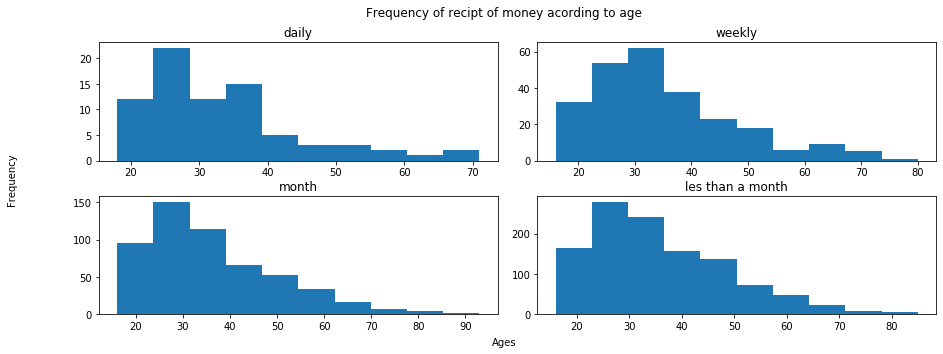

In [13]:
fig, axz = plt.subplots(2, 2,figsize=(15,5),gridspec_kw={'hspace': 0.3,'wspace': 0.1})
fig.suptitle('Frequency of recipt of money acording to age')
( ax2, ax3),(ax4, ax5) = axz 


fig.text(0.5, 0.04, 'Ages', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

#ax1.hist(never['Q1'])
#ax1.set_title('never')
ax2.hist(daily['Q1'])
ax2.set_title('daily')
ax3.hist(weekly['Q1'])
ax3.set_title('weekly')
ax4.hist(monthly['Q1'])
ax4.set_title('month')
ax5.hist(les_than_month['Q1'])
ax5.set_title('les than a month')
#ax6.hist(non['Q1'])
#ax6.set_title('none')

As previously  mentioned, the younger age groups seem to be generally more active and recieving money at diferent time intervals.
whats important is the freqeuncy of the graphs , less than  a month , has  the higehst scale while daily has the daily ghas the lowest , weekly and monthly have the lower midle and upper modle scale repspectively.
generally people who use these services do not recieve money often or in short inetrvals.

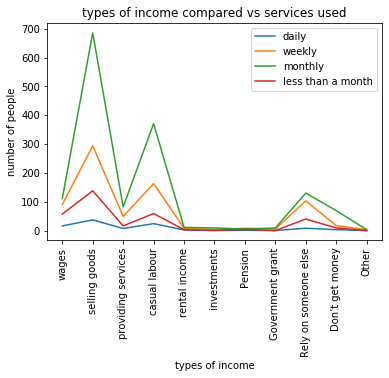

In [14]:
nom_val1 = (never['Q8_1'] == 1).sum()
nom_val2 = (never['Q8_2'] == 1).sum()
nom_val3 = (never['Q8_3'] == 1).sum()
nom_val4 = (never['Q8_4'] == 1).sum()
nom_val5 = (never['Q8_5'] == 1).sum()
nom_val6 = (never['Q8_6'] == 1).sum()
nom_val7 = (never['Q8_7'] == 1).sum()
nom_val8 = (never['Q8_8'] == 1).sum()
nom_val9 = (never['Q8_9'] == 1).sum()
nom_val10 = (never['Q8_10'] == 1).sum()
nom_val11 = (never['Q8_11'] == 1).sum()

val1 = (daily['Q8_1'] == 1).sum()
val2 = (daily['Q8_2'] == 1).sum()
val3 = (daily['Q8_3'] == 1).sum()
val4 = (daily['Q8_4'] == 1).sum()
val5 = (daily['Q8_5'] == 1).sum()
val6 = (daily['Q8_6'] == 1).sum()
val7 = (daily['Q8_7'] == 1).sum()
val8 = (daily['Q8_8'] == 1).sum()
val9 = (daily['Q8_9'] == 1).sum()
val10 = (daily['Q8_10'] == 1).sum()
val11 = (daily['Q8_11'] == 1).sum()

mob_val1 = (weekly['Q8_1'] == 1).sum()
mob_val2 = (weekly['Q8_2'] == 1).sum()
mob_val3 = (weekly['Q8_3'] == 1).sum()
mob_val4 = (weekly['Q8_4'] == 1).sum()
mob_val5 = (weekly['Q8_5'] == 1).sum()
mob_val6 = (weekly['Q8_6'] == 1).sum()
mob_val7 = (weekly['Q8_7'] == 1).sum()
mob_val8 = (weekly['Q8_8'] == 1).sum()
mob_val9 = (weekly['Q8_9'] == 1).sum()
mob_val10 = (weekly['Q8_10'] == 1).sum()
mob_val11 = (weekly['Q8_11'] == 1).sum()

b_val1 = (monthly['Q8_1'] == 1).sum()
b_val2 = (monthly['Q8_2'] == 1).sum()
b_val3 = (monthly['Q8_3'] == 1).sum()
b_val4 = (monthly['Q8_4'] == 1).sum()
b_val5 = (monthly['Q8_5'] == 1).sum()
b_val6 = (monthly['Q8_6'] == 1).sum()
b_val7 = (monthly['Q8_7'] == 1).sum()
b_val8 = (monthly['Q8_8'] == 1).sum()
b_val9 = (monthly['Q8_9'] == 1).sum()
b_val10 = (monthly['Q8_10'] == 1).sum()
b_val11 = (monthly['Q8_11'] == 1).sum()

c_val1 = (les_than_month['Q8_1'] == 1).sum()
c_val2 = (les_than_month['Q8_2'] == 1).sum()
c_val3 = (les_than_month['Q8_3'] == 1).sum()
c_val4 = (les_than_month['Q8_4'] == 1).sum()
c_val5 = (les_than_month['Q8_5'] == 1).sum()
c_val6 = (les_than_month['Q8_6'] == 1).sum()
c_val7 = (les_than_month['Q8_7'] == 1).sum()
c_val8 = (les_than_month['Q8_8'] == 1).sum()
c_val9 = (les_than_month['Q8_9'] == 1).sum()
c_val10 = (les_than_month['Q8_10'] == 1).sum()
c_val11 = (les_than_month['Q8_11'] == 1).sum()

#plt.plot([nom_val1,nom_val2,nom_val3,nom_val4,nom_val5,nom_val6,nom_val7,nom_val8,nom_val9,nom_val10,nom_val11],label="Never")
plt.plot([val1,val2,val3,val4,val5,val6,val7,val8,val9,val10,val11],label="daily")
plt.plot([b_val1,b_val2,b_val3,b_val4,b_val5,b_val6,b_val7,b_val8,b_val9,b_val10,b_val11],label="weekly")
plt.plot([c_val1,c_val2,c_val3,c_val4,c_val5,c_val6,c_val7,c_val8,c_val9,c_val10,c_val11],label="monthly")
plt.plot([mob_val1,mob_val2,mob_val3,mob_val4,mob_val5,mob_val6,mob_val7,mob_val8,mob_val9,mob_val10,mob_val11],label="less than a month")
plt.xticks(np.arange(11), ('wages', 'selling goods', 'providing services', 'casual labour', 'rental income', 'investments', 'Pension', 'Government grant', 'Rely on someone else', 'Don’t get money', 'Other'),rotation = 90)
plt.title('types of income compared vs services used')
plt.ylabel('number of people')
plt.xlabel('types of income')
plt.legend()

plt.show()

People who receive an income by selling goods, performing casual labour, or relying on someone else generally make use of financial services more frequently than others. We can also see that, typically, those who receive daily incomes are the least likely to make use of financial services, with those who receive an income less than once a month follow, with the second lowest use of financial services. People who receive monthly incomes are the most likely to use financial services.

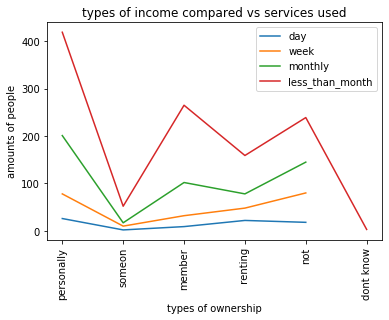

In [15]:
never_status = never.groupby('Q5').Q5.count()
week_status = weekly.groupby('Q5').Q5.count()
day_status = daily.groupby('Q5').Q5.count()
month_status = monthly.groupby('Q5').Q5.count()
less_status = les_than_month.groupby('Q5').Q5.count()

plt.title('types of income compared vs services used')
plt.xticks(np.arange(11), ('','personally','someon', 'member', ' renting','not','dont know'),rotation = 90)

plt.ylabel('amounts of people')
plt.xlabel('types of ownership')
plt.plot(day_status,label = 'day')
plt.plot(week_status,label= 'week')
plt.plot(month_status,label = 'monthly')
plt.plot(less_status,label = 'less_than_month')
plt.legend()

#plt.plot(never_status)
plt.show()


Those who live with someone in the house owns the land, have particularly low participation , could be that these individuals still live with their parents/ still live at home and are unemployed or  still studying.
However what is suprising is Those renting  property also seem to have a lowere usage of fiancial services overall, however one might have expected these individuals to use fincail services a lot perhaps to pay their bills.

People who personally own land have the higehst use of finacial services this could be that they they recieve money fom sub leting their land through these services.

Both who have family members who oen land and who do not own any land haeve a  generall higher use of finacial services.

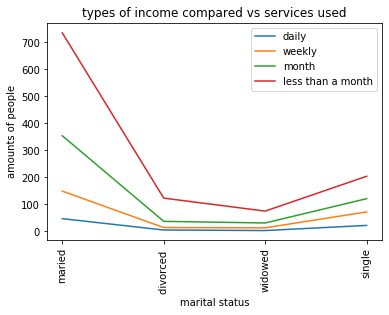

In [16]:

never_status = never.groupby('Q3').Q3.count()
week_status = weekly.groupby('Q3').Q3.count()
day_status = daily.groupby('Q3').Q3.count()
month_status = monthly.groupby('Q3').Q3.count()
less_status = les_than_month.groupby('Q3').Q3.count()

plt.xticks(np.arange(5), ('','maried', 'divorced ', 'widowed', 'single'),rotation = 90)
plt.title('types of income compared vs services used')

plt.ylabel('amounts of people')
plt.xlabel('marital status')

plt.plot(day_status,label='daily')
plt.plot(week_status,label='weekly')
plt.plot(month_status,label='month')
plt.plot(less_status,label='less than a month')
plt.legend()
#plt.plot(never_status)


In general, more married people make use of financial services than any other demographic, with single people following and the widowed population making use of these services the least. 

The less frequently one receives a stream of income, regardless of their marital status, the more likely they are to make use of financial services. 

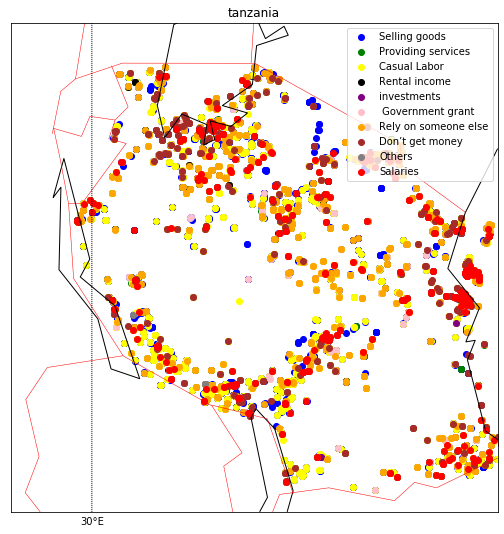

In [17]:

lat1 = mobile_money_df.loc[mobile_money_df['Q8_1'] == 1]
lat2 = mobile_money_df.loc[mobile_money_df['Q8_2'] == 1]
lat3 = mobile_money_df.loc[mobile_money_df['Q8_3'] == 1]
lat4 = mobile_money_df.loc[mobile_money_df['Q8_4'] == 1]
lat5 = mobile_money_df.loc[mobile_money_df['Q8_5'] == 1]
lat6 = mobile_money_df.loc[mobile_money_df['Q8_6'] == 1]
lat7 = mobile_money_df.loc[mobile_money_df['Q8_7'] == 1]
lat8 = mobile_money_df.loc[mobile_money_df['Q8_8'] == 1]
lat9 = mobile_money_df.loc[mobile_money_df['Q8_9'] == 1]
lat10 = mobile_money_df.loc[mobile_money_df['Q8_10'] == 1]
lat11 =mobile_money_df.loc[mobile_money_df['Q8_11'] == 1]


fig = plt.figure(figsize=(12,9))
m = Basemap(projection='mill',
           llcrnrlat=-12,
           urcrnrlat=0,
           llcrnrlon=28,
           urcrnrlon=40,
           width = 1000000000,
           height = 10000000,
           resolution='c')
m.drawcoastlines()
m.drawcountries(color="red")
m.drawparallels(np.arange(-90,90,30),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
long = mobile_money_df['Longitude'].tolist()

lati= mobile_money_df['Latitude'].tolist()
#m.scatter(long,lati,latlon=True)
m.scatter(lat2['Longitude'].tolist(),lat2['Latitude'].tolist(),latlon=True,color='Blue',label = 'Selling goods')
m.scatter(lat3['Longitude'].tolist(),lat3['Latitude'].tolist(),latlon=True,color='Green',label = 'Providing services')
m.scatter(lat4['Longitude'].tolist(),lat4['Latitude'].tolist(),latlon=True,color='Yellow',label = 'Casual Labor')
m.scatter(lat6['Longitude'].tolist(),lat6['Latitude'].tolist(),latlon=True,color='Black',label = 'Rental income')
m.scatter(lat7['Longitude'].tolist(),lat7['Latitude'].tolist(),latlon=True,color='Purple',label = 'investments')
m.scatter(lat8['Longitude'].tolist(),lat8['Latitude'].tolist(),latlon=True,color='Pink',label = ' Government grant ')
m.scatter(lat9['Longitude'].tolist(),lat9['Latitude'].tolist(),latlon=True,color='Orange',label = 'Rely on someone else')
m.scatter(lat10['Longitude'].tolist(),lat10['Latitude'].tolist(),latlon=True,color='Brown',label = 'Don’t get money')
m.scatter(lat11['Longitude'].tolist(),lat11['Latitude'].tolist(),latlon=True,color='Grey',label = 'Others')
m.scatter(lat1['Longitude'].tolist(),lat1['Latitude'].tolist(),latlon=True,color='Red',label = 'Salaries')
plt.title("tanzania")
plt.legend()
plt.show()


The most pronounced colors or most participants seem get money through,  casual labour, rely on someone else, salary and selling goods or don't get money.

Most surveys were for people at the edges of the country.

# conclusion
#### Age
The population of Tanzania or at least the ones that took the survey were fairly young ,the majority of people lied between 0-40 years old.this seems true because for the population because the histogram shape seem the same throughout therefore informing us that it's not an anomaly this is the shape of this population.
Particularly people between the ages of 20 to 30 , are very active in the main economic group.
Gender:
generally more males use financial services than females .Less females receive money less on average on a daily, weekly or monthly basis.  

#### Marital Status

The vast majority of people who use financial services are married .This is surprising because one would have expected more single people to be represented since they often make the majority of the population in any society.

#### Land ownership
There doesn’t seem to be a strong correlation between land ownership status and use of financial services.
Types of income
3 key people who seem to use financial services a lot. Are those selling goods, do casual labour or rely on someone else.

#### Geographic
Most surveys were for people at the edges of the country.
